In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# train 
train = pd.read_csv("train.csv")
train.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#test 
test= pd.read_csv("test.csv")
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1) 

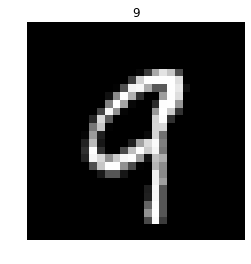

In [5]:
img = X_train.iloc[41999].as_matrix()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[41999,0])
plt.axis("off")
plt.show()

In [6]:
# Normalization
X_train = X_train/255
test = test/255

In [7]:
# Reshape for keras
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [8]:
# Encoding 
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 10)

Using TensorFlow backend.


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)

In [10]:
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam,RMSprop
from keras.preprocessing.image import ImageDataGenerator

model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = (5,5), padding = "valid", activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = "valid", activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation = "softmax"))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
#opt2 = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)

In [12]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [13]:
epochs = 5
batch_size = 256

In [14]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range= 1,
        zoom_range = 1,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=False,
        vertical_flip=False)

datagen.fit(X_train)

In [15]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
147/147 [==============================] - 19s 127ms/step - loss: 2.1966 - acc: 0.1973 - val_loss: 1.6122 - val_acc: 0.4560
Epoch 2/5
147/147 [==============================] - 18s 124ms/step - loss: 1.9672 - acc: 0.3129 - val_loss: 1.1754 - val_acc: 0.6060
Epoch 3/5
147/147 [==============================] - 19s 126ms/step - loss: 1.8193 - acc: 0.3682 - val_loss: 0.9796 - val_acc: 0.7464
Epoch 4/5
147/147 [==============================] - 19s 127ms/step - loss: 1.7289 - acc: 0.4025 - val_loss: 0.7934 - val_acc: 0.8088
Epoch 5/5
147/147 [==============================] - 19s 126ms/step - loss: 1.6589 - acc: 0.4242 - val_loss: 0.7017 - val_acc: 0.8121


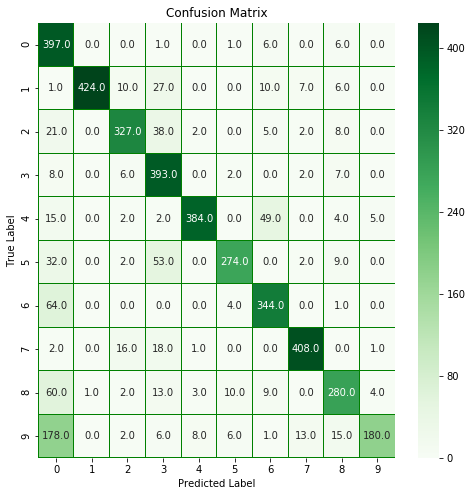

In [16]:
# confusion matrix

Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_val,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="green", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [17]:
ynew = model.predict_classes(test)

In [18]:
def predictit(a):
    img = test[a]
    img = img.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.title("Digit Pic")
    plt.axis("off")
    plt.show()
    print("Predicted=%s" % (ynew[a]))

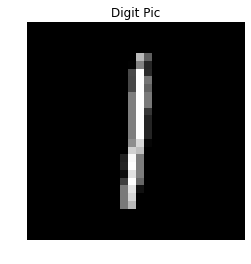

Predicted=1


In [21]:
predictit(178)